# We Rate Dogs Data Review

## Gather

In this first section we will gather all of the relevent information that is going to be required for this project.

In [1]:
#Importing relevant packages
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib
import matplotlib.pyplot as plt
from nltk import pos_tag

%matplotlib inline

matplotlib.style.use('seaborn-whitegrid')

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.set_index('tweet_id', inplace = True)
archive.head(5)

in_reply_to_status_id  in_reply_to_user_id  \
tweet_id                                                         
892420643555336193                    NaN                  NaN   
892177421306343426                    NaN                  NaN   
891815181378084864                    NaN                  NaN   
891689557279858688                    NaN                  NaN   
891327558926688256                    NaN                  NaN   

                                    timestamp  \
tweet_id                                        
892420643555336193  2017-08-01 16:23:56 +0000   
892177421306343426  2017-08-01 00:17:27 +0000   
891815181378084864  2017-07-31 00:18:03 +0000   
891689557279858688  2017-07-30 15:58:51 +0000   
891327558926688256  2017-07-29 16:00:24 +0000   

                                                               source  \
tweet_id                                                                
892420643555336193  <a href="http://twitter.com/download/iphone" r...   
892177421306343426  <a href="http://twitter.com/download/iphone" r...   
891815181378084864  <a href="http://twitter.com/download/iphone" r...   
891689557279858688  <a href="http://twitter.com/download/iphone" r...   
891327558926688256  <a href="http://twitter.com/download/iphone" r...   

                                                                 text  \
tweet_id                                                                
892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
892177421306343426  This is Tilly. She's just checking pup on you....   
891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
891689557279858688  This is Darla. She commenced a snooze mid meal...   
891327558926688256  This is Franklin. He would like you to stop ca...   

                    retweeted_status_id  retweeted_status_user_id  \
tweet_id                                                            
892420643555336193                  NaN                       NaN   
892177421306343426                  NaN                       NaN   
891815181378084864                  NaN                       NaN   
891689557279858688                  NaN                       NaN   
891327558926688256                  NaN                       NaN   

                   retweeted_status_timestamp  \
tweet_id                                        
892420643555336193                        NaN   
892177421306343426                        NaN   
891815181378084864                        NaN   
891689557279858688                        NaN   
891327558926688256                        NaN   

                                                        expanded_urls  \
tweet_id                                                                
892420643555336193  https://twitter.com/dog_rates/status/892420643...   
892177421306343426  https://twitter.com/dog_rates/status/892177421...   
891815181378084864  https://twitter.com/dog_rates/status/891815181...   
891689557279858688  https://twitter.com/dog_rates/status/891689557...   
891327558926688256  https://twitter.com/dog_rates/status/891327558...   

                    rating_numerator  rating_denominator      name doggo  \
tweet_id                                                                   
892420643555336193                13                  10   Phineas  None   
892177421306343426                13                  10     Tilly  None   
891815181378084864                12                  10    Archie  None   
891689557279858688                13                  10     Darla  None   
891327558926688256                12                  10  Franklin  None   

                   floofer pupper puppo  
tweet_id                                 
892420643555336193    None   None  None  
892177421306343426    None   None  None  
891815181378084864    None   None  None  
891689557279858688    None   None  None  
891327558926688256    None   None  None

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

In [4]:
#Importing data from Tweepy
consumer_key = 'xxxxxxx'
consumer_secret = 'xxxxxxx'
access_token = 'xxxxxxx-xxxxxxx'
access_secret = 'xxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

### Creating a JSON file

In [5]:
df_list = []
e_list = []
tweet_id = images['tweet_id']

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        e_list.append(id)

In [6]:
#Rerunning the code to verify all errors are valid
e_list


[680055455951884288,
 754011816964026368,
 802247111496568832,
 829374341691346946,
 837012587749474308,
 837366284874571778,
 842892208864923648,
 844704788403113984,
 851953902622658560,
 861769973181624320,
 872261713294495745,
 873697596434513921,
 888202515573088257]

In [7]:
ee_list = []
for e in e_list:
    try:
        page = api.get_status(e)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
        
    except Exception:
        ee_list.append(id)

In [8]:
jsondf = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
jsondf.to_csv('tweet_json.txt', encoding = 'utf-8')

In [9]:
jsondfo = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
jsondf = jsondfo.copy()# making a copy of the file
jsondf.set_index('tweet_id', inplace = True)
jsondf.tail(5)

Unnamed: 0  favorites  retweet_count
tweet_id                                                
891327558926688256        2057      38882           8885
891689557279858688        2058      40659           8197
891815181378084864        2059      24217           3947
892177421306343426        2060      32112           5966
892420643555336193        2061      37363           8037

In [10]:
images.set_index('tweet_id', inplace = True)
df = pd.merge(left=archive, right=images, left_index=True, right_index=True, how='left') # Merging the first set of files
df = pd.merge(left=df, right=jsondf, left_index=True, right_index=True, how='left') #Merging the second set of files
df.to_csv('dfcopy.csv', encoding = 'utf-8') # making a copy of the file

In [11]:
dfo = pd.read_csv('dfcopy.csv') # then start here whenever I load the notebook while woring on it
df = dfo.copy()

## Assess

In this next section, we will analyze the datasets for any errors or changes that need to be made to the files. We will check the information and explore the data to get a better understanding of the information.

### About the Data
The datasets explores the database for the Weratedogs Twitter dataset. The data includes information about the ratings for each dog, their type, number of tweets and retweets, and more. The data was scrubbed from twitter using an API and detaield into a json, csv, and txt file which I've combined into one dataset.

### Exploring the data

In [12]:
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      ...       p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...      ...        False   
1  https://twitter.com/dog_rates/status/892177421...      ...         True   
2  https://twitter.com/dog_rates/status/891815181...      ...         True   
3  https://twitter.com/dog_rates/status/891689557...      ...        False   
4  https://twitter.com/dog_rates/status/891327558...      ...         True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog Unnamed: 0  favorites retweet_count  
0  False     2061.0    37363.0        8037.0  
1   True     2060.0    32112.0        5966.0  
2   True     2059.0    24217.0        3947.0  
3  False     2058.0    40659.0        8197.0  
4   True     2057.0    38882.0        8885.0  

[5 rows x 31 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [14]:
df.shape

(2356, 31)

In [15]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator      img_num      p1_conf       p2_conf  \
count         2356.000000  2075.000000  2075.000000  2.075000e+03   
mean            10.455433     1.203855     0.594548  1.345886e-01   
std              6.745237     0.561875     0.271174  1.006657e-01   
min              0.000000     1.000000     0.044333  1.011300e-08   
25%             10.000000     1.000000     0.364412  5.388625e-02   
50%             10.000000     1.000000     0.588230  1.181810e-01   
75%             10.000000     1.000000     0.843855  1.955655e-01   
max            170.000000     4.000000     1.000000  4.880140e-01   

            p3_conf   Unnamed: 0      favorites  retweet_count  
count  2.075000e+03  2062.000000    2062.000000    2062.000000  
mean   6.032417e-02  1030.500000    8221.489816    2703.237148  
std    5.090593e-02   595.392448   12414.381693    4724.756877  
min    1.740170e-10     0.000000       0.000000      11.000000  
25%    1.622240e-02   515.250000    1569.000000     577.000000  
50%    4.944380e-02  1030.500000    3632.000000    1276.000000  
75%    9.180755e-02  1545.750000   10265.000000    3105.000000  
max    2.734190e-01  2061.000000  161349.000000   81173.000000

In [16]:
df['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Tucker             10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Bailey              7
Daisy               7
Buddy               7
Toby                7
an                  7
Leo                 6
Jax                 6
Dave                6
Stanley             6
Milo                6
Rusty               6
Jack                6
Koda                6
Scout               6
Oscar               6
Bella               6
very                5
                 ... 
Timber              1
Herb                1
Severus             1
Kendall             1
Craig               1
Christoper          1
Monster             1
Jarvis              1
Tycho               1
Storkson            1
Lacy                1
Filup               1
Bode                1
Wesley              1
Brockly   

In [17]:
df['rating_numerator'].value_counts()
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Explore Analysis

##### Number of rows

Image data frame has 2075 rows

Archie data frame has 2356 rows

- **tweet_id**: The unique identififer for each tweet in the tweet table for we rate dogs dataset
- **in_reply_status_id**: The unique identifer for the tweet reply
- **in_reply_to_user_id**: The unique idenfier for the user who posted a reply
- **timestamp**: The date and time the tweet was posted
- **source**: The platform that the tweet was posted from
- **text**: The text contained in the tweet
- **retweeted_status_id**: The unique identifer for the retweeted post
- **retweeted_status_user_id**: The unique user if for the retweeted post
- **retweeted_staus_timestamp**: The time stamp of the retweet
- **expanded_urls**: The photo URL
- **rating_numerator**: The posted score for the dog
- **rating_denominator**: The denominator for the highest value
- **jpg_url** The url for the image
- **img_num** The number the image is
- **name**: The name of the dog
- **doggo**: The type of dog
- **floofer**: The type of dog
- **pupper**: The type of dog
- **puppo**: The type of dog
- **p1**: The algorithm's #1 prediction for the image in the tweet
- **p1_conf**: How confident the algorithm is in its #1 prediction
- **p1_dog**: Whether or not the #1 prediction is a breed of dog
- **p2**:  The algorithm's second most likely prediction
- **p2_conf**: How confident the algorithm is in its #2 prediction    
- **p2_dog**: Whether or not the #2 prediction is a breed of dog     
- **p3**:   The algorithm's third most likely prediction           
- **p3_conf**: How confident the algorithm is in its #3 prediction
- **p3_dog**: Whether or not the #3 prediction is a breed of dog
- **Unnamed: 0**: Error column
- **favorites**: Number of times the tweet was favorited
- **retweet_count**: Number of times the tweet was retweeted

### Assessing the Issues

### Quality
- Convert datatime data times to timestamp
- Remove retweets
- Remove additional index
- Correct ratings for incorrect data
- Set denominator to correct value
- Incorrect dog names
- Set appropriate entries for missing data
- Extract correct HTML data



### Tidiness
- Combine dog stages into a single column
- Combine dog breeds together

# Clean


### Convert Timestamp Column to Datetime
#### Define:
Convert the timestamp column to a datetime datatype, this will also remove the 0000's at the end.

#### Code:

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                 

### Delete Retweets and Remove Unnamed Column
#### Define:
For this study, we are not going to include posts that are retweets. There is also a secondary index column named Unnamed that will need to be removed.

#### Code:

In [20]:
#Removing the files with no pictures and extra retweets
del df['Unnamed: 0'] 
df = df[pd.notnull(df['jpg_url'])] #no pictures
df = df[pd.isnull(df['retweeted_status_id'])] #extra retweets

In [21]:
#Removing the extra unnesseary columns
del df['retweeted_status_id']
del df['retweeted_status_user_id']
del df['retweeted_status_timestamp']

In [22]:
#Drop redundent columns
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    199

### Combine Dog Stages
#### Define
The dog stages are currently split up into their own columns, creating extra data that is unneccessary. We will combine the dog stages into a single column and then remove all the none values.

#### Code:

In [24]:
#Creating a function to add the dog types into a single column.
dog_type = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')
        
#Removing extra column
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test:

In [25]:
df['dog_type'] = dog_type
df['dog_type'].value_counts()

None       1625
pupper      237
doggo        69
floofer      34
puppo        29
Name: dog_type, dtype: int64

### Combine Dog Breeds
#### Define:
In this step, we are going to combine the dog breeds into a single column

#### Code:

In [26]:
# function to combine dog breeds
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
    # Removing extra data

df.apply(breed_confidence, axis=1)
df['breed'] = breed
df['confidence'] = confidence


#### Test:

In [27]:
df.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                           jpg_url  img_num     ...      \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0     ...       
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0     ...       
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0     ...       
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0     ...       
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0     ...       

    p2_conf  p2_dog                           p3   p3_conf  p3_dog favorites  \
0  0.085851   False                       banana  0.076110   False   37363.0   
1  0.090647    True                     papillon  0.068957    True   32112.0   
2  0.078253    True                       kelpie  0.031379    True   24217.0   
3  0.168086    True                      spatula  0.040836   False   40659.0   
4  0.225770    True  German_short-haired_pointer  0.175219    True   38882.0   

  retweet_count  dog_type               breed  confidence  
0        8037.0      None      Unidentifiable    0.000000  
1        5966.0      None           Chihuahua    0.323581  
2        3947.0      None           Chihuahua    0.716012  
3        8197.0      None  Labrador_retriever    0.168086  
4        8885.0      None              basset    0.555712  

[5 rows x 24 columns]

### Extract the ratings from the columns
#### Define:
In order to determine the correct rating for the dogs, I'm going to extract each rating and insert int into a new column.


#### Code:

In [28]:
rates = []

extract_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

df['text'].apply(extract_rates)

numerator = []
dog_count = []

for item in rates:
    
    # function for tweets with no rating, but a picture, so a dog
    if len(item) == 0:
        numerator.append('NaN')
        dog_count.append(1)
        
    # function for tweets with one rating and one dog
    elif len(item) == 1 and item[0][-1] == '10':
        numerator.append(float(item[0][0]))
        dog_count.append(1)
   
    # function for group ratings
    elif len(item) == 1: 
        avg = float(item[0][0]) / (float(item[0][-1]) / 10) 
        numerator.append(avg)
        dog_count.append(float(item[0][-1]) / 10)
   
    # function for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        list = []
        for i in range(len(item)):
            if item[i][-1] == '10': #excluding 10/10 rating
                list.append(item[i])
        for rate in list:
            total = total + float(rate[0])
        avg = total / len(item)
        numerator.append(avg)
        dog_count.append(len(item))
   
    # catching anyting not covered
    else:
        numerator.append('Not parsed')
        dog_count.append('Not parsed') 
        
df['rating'] = numerator #creates a base denominator
df['dog_count'] = dog_count
df['rating'].value_counts()

12.0                 453
10.0                 411
11.0                 399
13.0                 261
9.0                  152
8.0                   94
7.0                   52
14.0                  36
6.0                   32
5.0                   30
3.0                   19
4.0                   14
2.0                    9
8.5                    4
1.0                    4
7.5                    3
9.5                    3
5.5                    2
6.5                    2
10.5                   2
0.0                    2
1776.0                 1
9.75                   1
9.666666666666666      1
4.5                    1
11.27                  1
NaN                    1
13.5                   1
420.0                  1
11.5                   1
11.26                  1
Name: rating, dtype: int64

In [29]:
#Droping the now unncessary columns since it's no longer needed
df.drop([ 'rating_numerator', 'rating_denominator'], axis=1, inplace=True)


#### Test:

In [30]:
df['dog_count'].value_counts()


1.0     1958
2.0       23
5.0        2
8.0        2
3.0        1
12.0       1
11.0       1
13.0       1
4.0        1
9.0        1
17.0       1
15.0       1
7.0        1
Name: dog_count, dtype: int64

### Extracting Names for Error Values
#### Define:

Extrct and correct the names in the name columns

#### Code:

In [31]:
df['text_split'] = df['text'].str.split()


In [32]:
names = []

#using a string method to clean up the data

def extract_names(row):
    
    # 'This is Charlie'
    if row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Meet Charlie'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
    
    # 'Say hello to Charlie'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Here we have Charlie'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'named Charlie'           
    elif 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

len(names)
df['names'] = names
df.drop('name', axis = 1, inplace = True)


#### Test:

In [33]:
df['names'].value_counts()

Nameless          625
Charlie            11
Oliver             10
Lucy               10
Cooper             10
Penny               9
Tucker              9
Winston             8
Sadie               8
Lola                7
Daisy               7
Jax                 6
Stanley             6
Bella               6
Koda                6
Bo                  6
Toby                6
Rusty               5
Oscar               5
Louis               5
Chester             5
Milo                5
Leo                 5
Scout               5
Bailey              5
Buddy               5
Oakley              4
Cassie              4
Gus                 4
Brody               4
                 ... 
Bungalo             1
Norman              1
Octaviath.          1
Rorie               1
Nico                1
Banditt             1
Koko                1
Barclay             1
Geno                1
Tickles.            1
Harry               1
Wylie.              1
Jaycob              1
Banjo               1
Chesney   

### Set Appropaite Values to Certain Columns
#### Define:
For better analysis, setting values of 'none, etc' to None


In [34]:
df.loc[df['names'] == 'Nameless', 'names'] = None
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan

#### Test

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id         1994 non-null int64
timestamp        1994 non-null datetime64[ns]
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
jpg_url          1994 non-null object
img_num          1994 non-null float64
p1               1994 non-null object
p1_conf          1994 non-null float64
p1_dog           1994 non-null object
p2               1994 non-null object
p2_conf          1994 non-null float64
p2_dog           1994 non-null object
p3               1994 non-null object
p3_conf          1994 non-null float64
p3_dog           1994 non-null object
favorites        1988 non-null float64
retweet_count    1988 non-null float64
dog_type         369 non-null object
breed            1686 non-null object
confidence       1686 non-null float64
rating           1992 non-null object
dog_count        1994 non-null float64
text_

### Remove html data from source
#### Define
We will be removing the excess HTML tag data from the **source** column for better analysis.

#### Code

In [36]:
df['source'] = df['source'].str.split('>').str.get(1)
df['source'] = df['source'].str.split('<').str.get(0)

#### Test

In [37]:
df['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Visualization and Analysis

#### Retweets, Favorites and Ratings Correlation

Text(0,0.5,'Count')

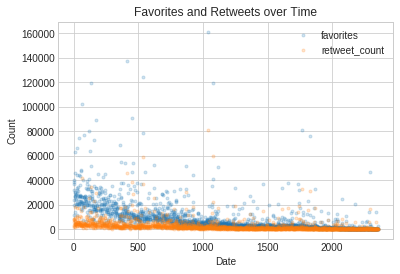

In [38]:
df[['favorites', 'retweet_count']].plot(style = '.', alpha = .2)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

#### Visual for Most Rated Breeds

Text(0,0.5,'Breed')

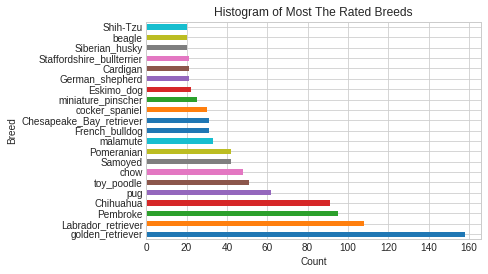

In [39]:
top_breeds=df.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')

In [40]:
top_breeds.groupby('breed')['rating'].describe()


count  unique   top  freq
breed                                               
Cardigan                    21.0     6.0  11.0   6.0
Chesapeake_Bay_retriever    31.0     8.0  10.0  10.0
Chihuahua                   91.0    12.0  12.0  23.0
Eskimo_dog                  22.0     6.0  12.0   7.0
French_bulldog              31.0     7.0  12.0   9.0
German_shepherd             21.0     6.0  12.0   7.0
Labrador_retriever         108.0     9.0  12.0  31.0
Pembroke                    95.0    10.0  12.0  30.0
Pomeranian                  42.0     8.0  12.0  13.0
Samoyed                     42.0     6.0  13.0  14.0
Shih-Tzu                    20.0     6.0  11.0   7.0
Siberian_husky              20.0     6.0  12.0   6.0
Staffordshire_bullterrier   21.0     6.0  11.0   7.0
beagle                      20.0     7.0  10.0   7.0
chow                        48.0     5.0  12.0  18.0
cocker_spaniel              30.0     6.0  12.0   9.0
golden_retriever           158.0    10.0  12.0  59.0
malamute                    33.0     6.0  10.0  11.0
miniature_pinscher          25.0     6.0  12.0   9.0
pug                         62.0     9.0  10.0  21.0
toy_poodle                  51.0     6.0  12.0  17.0

In [41]:
df['rating'].describe()

count     1992.0
unique      30.0
top         12.0
freq       453.0
Name: rating, dtype: float64

##### Quick Analysis: 
The data shows us that Golden Retreivers are the most rate breeds followed by a large margin by labador retrivers. Further analaysis would be required for the reasoning but it is a common believe that Golden Retrivers are some of the most reliable and friendly dogs.

#### Dog Stages Stats


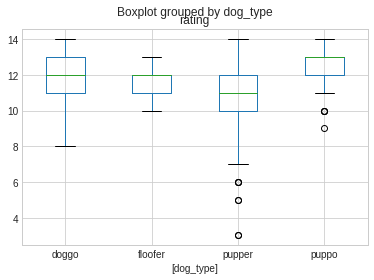

In [42]:
df.boxplot(column=['rating'], by=['dog_type']);


In [43]:
df.groupby('dog_type')['rating'].describe()


count  unique   top  freq
dog_type                           
doggo      69.0     6.0  11.0  20.0
floofer    34.0     4.0  12.0  18.0
pupper    237.0    14.0  11.0  59.0
puppo      29.0     6.0  13.0  14.0

##### Quick Analysis:
The puppo stage has a much lower rate than the other stages of dogs. Floofers has a consistent range of having a high rating.

In [44]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8') #saved